<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


In [ ]:
#bibliotecas
import pandas as pd
import seaborn as sns
from IPython.display import Image

# Modelos Preditivos

Um algoritmo de AM preditivo (**supervisionado**) é uma função que, dado um conjunto de **exemplos rotulados**, constrói um **estimador**

* Se os valores do rótulo forem categóricos (strings) ou numéricos discretos e finitos, tem-se um problema de classificação e o estimador construído é chamado de **classificador**
* Se os valores do rótulo forem valores contínuos infinitos, tem-se um problema de regressão e o estimador construído é chamado de **regressor ou preditor**

O estimador construído (classificador ou preditor) é uma função que recebe um exemplo não conhecido (não rotulado) do problema e atribui um rótulo a esse exemplo


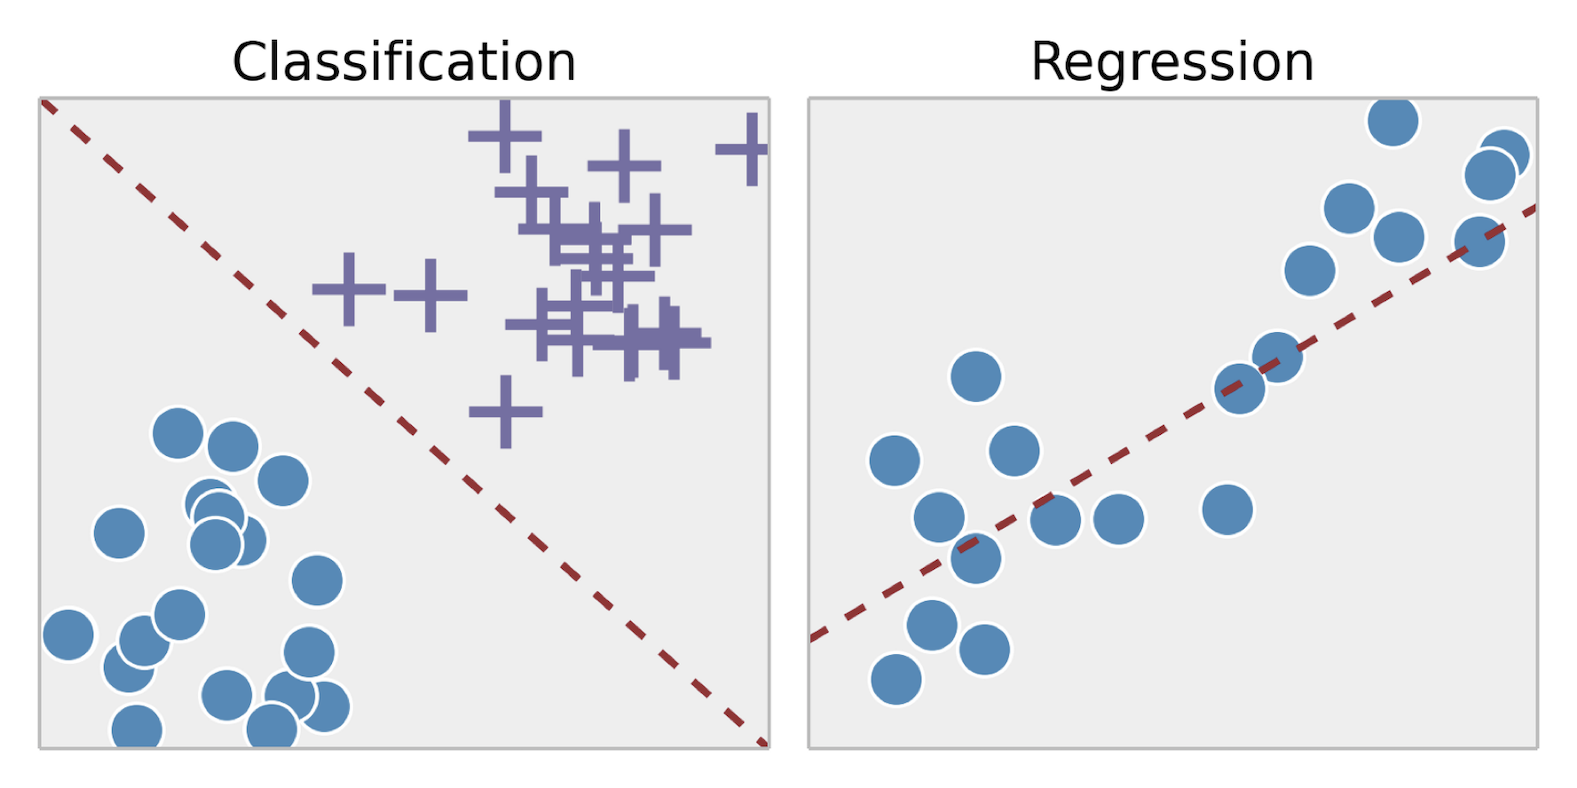

In [ ]:
Image('./img/preditivos.png', width = 800, height = 400)

# Modelos baseados em distância

https://scikit-learn.org/stable/modules/neighbors.html#classification

O método dos K vizinhos mais próximos, KNN, é um modelo baseado em distância, pois considera a proximidade entre os exemplos para realizar a classificação/predição.

A hipótese que esse tipo de modelo usa é de que dados similares tendem a estar concentrados em uma mesma região no espaço de entrada. Da mesma forma, dados que não são similares tendem a estar distantes entre si

Observe o gráfico abaixo para a base de classificação de flores de íris. Os exemplos de uma mesma classe estão representados por uma mesma cor

[Dataset retirado daqui](https://www.kaggle.com/vvenanccio/irisflowers)

In [ ]:
dfIris = pd.read_csv('./bases/iris.csv')

In [ ]:
dfIris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


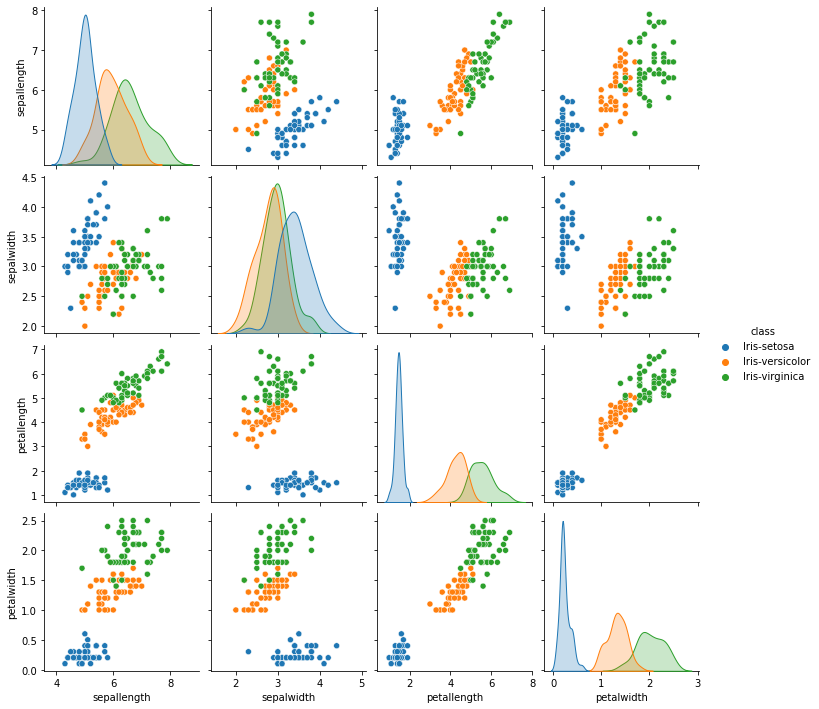

In [ ]:
#distribuição dos dados dessa base para cada atributo, observando por classe
sns.pairplot(data=dfIris, hue='class')

O algoritmo KNN classifica um novo objeto com base no exemplos do conjunto de treinamento (exemplos conhecidos) que são próximos a ele

É conhecido como algoritmo **preguiçoso (lazy)**, porque não aprende um modelo compacto para os dados, apenas memoriza os objetos conhecidos

Algoritmo de treino:
* Guarde os exemplos conhecidos
    
Algoritmo de classificação/predição:
* Calcule as distâncias do novo exemplo para os exemplos conhecidos
* **Classifique** o novo exemplo de acordo com a maioria dos k mais próximos (**votação simples ou ponderada**)
* Em caso de **regressão**, o novo exemplo será a média dos k vizinhos mais próximos (**média simples ou poderada**)
    
Principais hiperparâmetros do KNN:
* K
* Métrica de distância

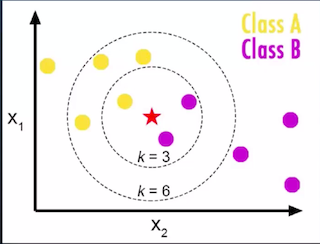

In [ ]:
Image('./img/difk.png')

Observe na imagem acima que **dependendo do valor de K, o resultado do estimador será diferente**
    
Em geral o valor de k é ímpar para evitar empates, em caso de classificação
    
**Deve-se testar para cada problema, qual o valor de k mais adequado**
    
Uma estratégia que pode ser adotada é atribuir peso à contribuição do vizinho, ou seja, os mais próximos serão mais significativos na votação (**votação ponderada**)
    
No sklearn isso pode ser feito através da palavra-chave **weights**. O valor **default ('uniform')**, atribui pesos uniformes a cada vizinho, o valor **'distance'** atribui pesos proporcionais ao inverso da distância do exemplo.
    
### Métricas de distância
    
A métrica de distância serve para calcular a distância entre dois pontos no espaço das entradas, nesse caso, entre um exemplo conhecido e um exemplo novo
    
A métrica mais usual é a **distância euclidiana**.

No sklearn as classes que implementam o KNN tanto para classificação quanto para regressão possuem um parâmetro chamado **metric** cujo valor default é ’minkowski’ e outro parâmetro chamado **p** cujo valor default é 2, o que caracteriza a distância euclidiana, como podemos ver nas fórmulas abaixo.

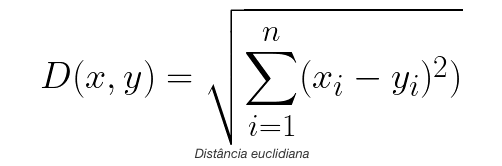

In [ ]:
Image('./img/DE.png')

Veja o exemplo de cálculo abaixo:

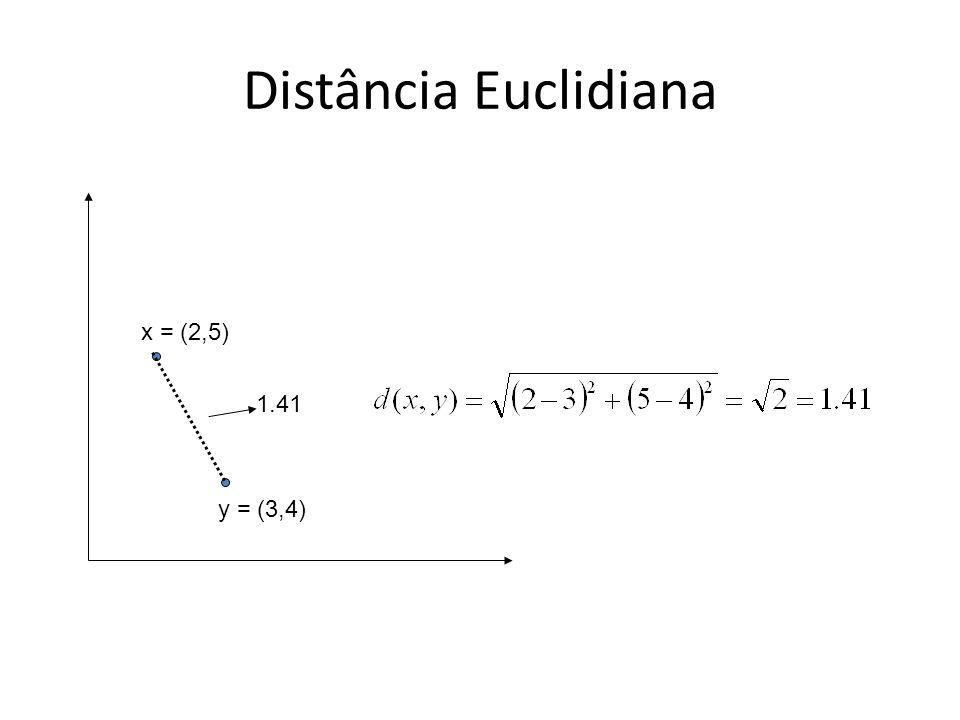

In [ ]:
Image('./img/exemploDE.jpg')

A distância de Manhattan possui p = 1

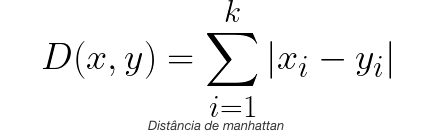

In [ ]:
Image('./img/DMa.png')

Na Distância de Minkowsky a **variável p é uma constante que deve ser escolhida**

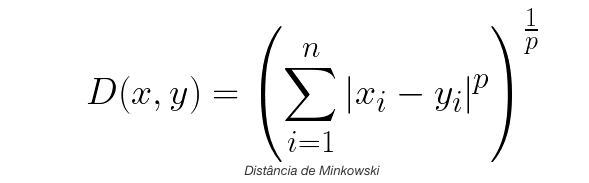

In [ ]:
Image('./img/DMi.png')

### Pontos Positivos

* Algoritmo simples
* Algoritmo incremental (novos exemplos podem ser adicionados a qualquer tempo, sem que nenhuma modificação deva ser feita)


### Pontos Negativos

* O algoritmo não obtem uma representação compacta dos exemplos conhecidos
* Custo computacional em caso de bases grandes (cálculo das distâncias)
* Afetado pela presença de atributos redundantes, irrelevantes e em escalas diferentes

O tratamento dos dados (**normalização**) e a seleção de subconjunto de atributos é recomendada para esse tipo de algoritmo

## KNN no sklearn



In [ ]:
#Vamos fazer a mudança de tipo da coluna alvo usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dfIris['class']) #ajusta a função aos dados

LabelEncoder()

In [ ]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
dfIris['class'] = le.transform(dfIris['class']) #aplica a função aos dados e atribui à coluna alvo

In [ ]:
dfIris #modificou

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#dividindo a base para um teste simples por enquanto
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfIris.drop(columns=['class']), dfIris['class'],test_size=0.33, stratify=dfIris['class'])

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #inicializa o objeto da classe com valores default

In [ ]:
knn.fit(X_train,y_train) #ajusta o modelo com os dados de treinamento

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Observe acima os parâmetros default**

### Previsões

In [ ]:
pred = knn.predict(X_test) #executa a predição para os dados de teste

In [ ]:
pred

array([0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0,
       0, 0, 2, 0, 0, 1])

In [ ]:
le.inverse_transform(pred) #se quisermos ver com os rótulos originais

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [ ]:
from sklearn import metrics #trabalharemos isso melhor na sequencia (notebook Avaliação.ipynb)

print("Acurácia:", metrics.accuracy_score(y_test, pred))

Acurácia: 0.96
